In [115]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Import the dataset (STEP 1)

In [116]:
import pandas as pd

LOCAL_DATA_FILE="diamonds.csv"

df= pd.read_csv(LOCAL_DATA_FILE)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis (STEP 2)

In [117]:
df.info()

#all the attributes are having same number of values. Probably there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Confirming that there are no missing values (STEP 2.a)

In [118]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [119]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### There are no missing data values in the dataset

## Checking for numeric and non-numeric attributes (STEP 2.b)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Cut, color and clarity are non-numeric attributes while others are numeric attributes
### Also from further domain research it appears cut, color and clarity are ordinal attributes

## Observing the values of x,y and z (STEP 2.C)

In [121]:
xyzdf=df[['x','y','z']]
xyzdf.head()

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75


In [122]:
xyzdf.describe()

,x,y,z
count,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734
std,1.121761,1.142135,0.705699
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


### From the statistics it appears that atleast some samples have x,y and z values as 0. 
### Since they represent the size(dimensions) of the diamond it is not possible to have their values as 0
### Explore further

In [123]:
zerodf=df.loc[(df['x']<0.001) | (df['y']<0.001) | (df['z']<0.001)]
zerodf

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [124]:
# There are rows with 0 dimensions
# Find the count of such rows
zerodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2207 to 51506
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   carat       20 non-null     float64
 2   cut         20 non-null     object 
 3   color       20 non-null     object 
 4   clarity     20 non-null     object 
 5   depth       20 non-null     float64
 6   table       20 non-null     float64
 7   price       20 non-null     int64  
 8   x           20 non-null     float64
 9   y           20 non-null     float64
 10  z           20 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.9+ KB


### There are 20 entries with 0 dimensions. Delete those rows

In [125]:
#dropping everything with zero dimensions
df = df[(df[['x','y','z']] != 0).all(axis=1)]

#Confirming if they are gone
df.loc[(df['x']<0.001) | (df['y']<0.001) | (df['z']<0.001)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


### All zero dimension data rows are deleted

### Adding a new derived parameter volume=x*y*z to get better insight

In [126]:
df["volume"]=df["x"]*df["y"]*df["z"]
df["volume"].describe()

count    53920.000000
mean       129.897567
std         78.219789
min         31.707984
25%         65.189759
50%        114.840180
75%        170.846415
max       3840.598060
Name: volume, dtype: float64

### Shows a high max value compared to mean. Probably an outlier

In [127]:
df[df["volume"]>1000]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,24068,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,3840.59806


### That is not a valid dimension for a diamond. It will look like a needle. So removing it

In [128]:
#dropping that huge volume value
df = df[(df[['volume']] < 2000).all(axis=1)]
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,volume
count,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000
mean,26972.409596,0.797676,61.749567,57.456843,3930.839685,5.731583,5.733901,3.539963,129.828747
std,15571.408384,0.473771,1.432292,2.234084,3987.158006,1.119387,1.116910,0.702267,76.570682
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,13487.500000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189349
50%,26974.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,40457.500000,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000,170.845492
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,31.800000,838.502400


## Plot Histogram pair plot and heatmap (STEP 2.d)

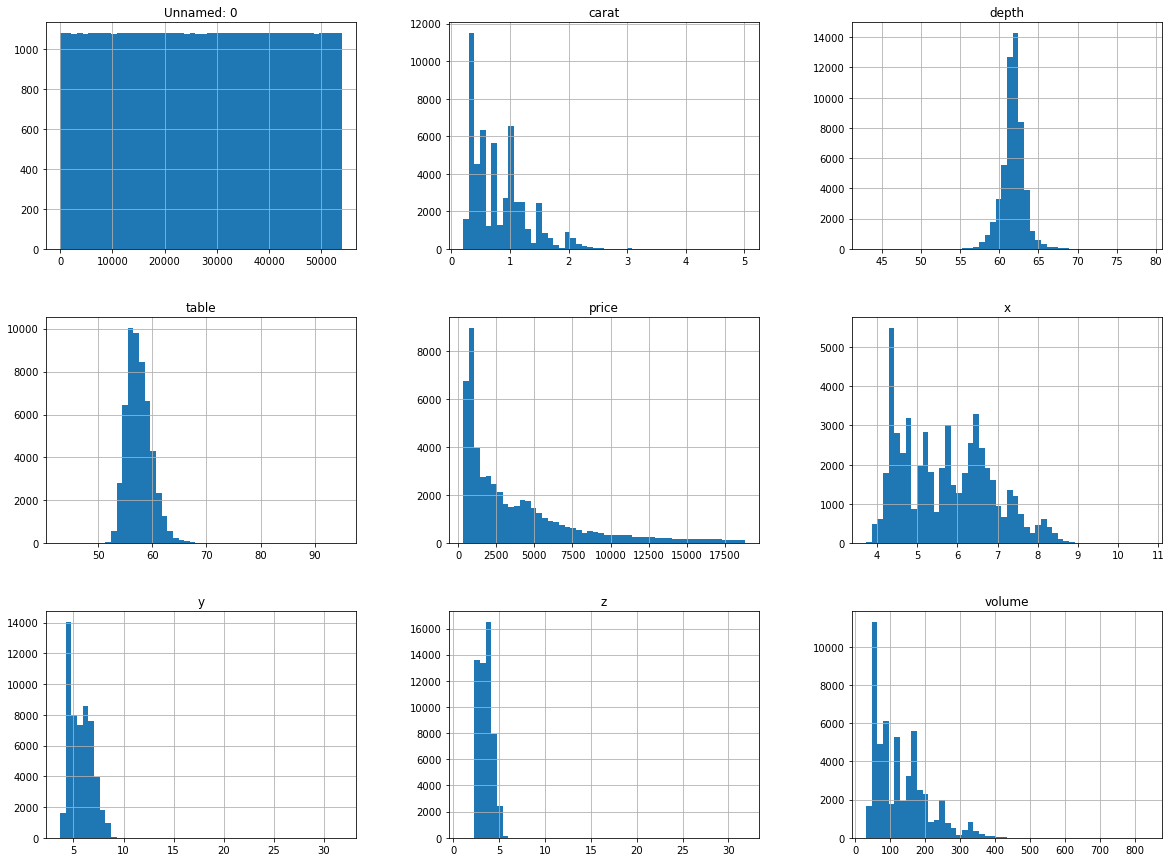

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

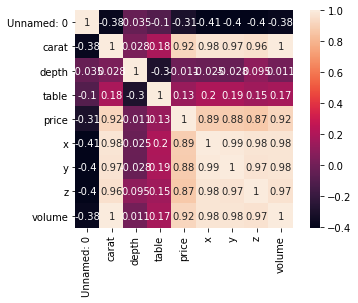

In [130]:
import seaborn as sns


corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)


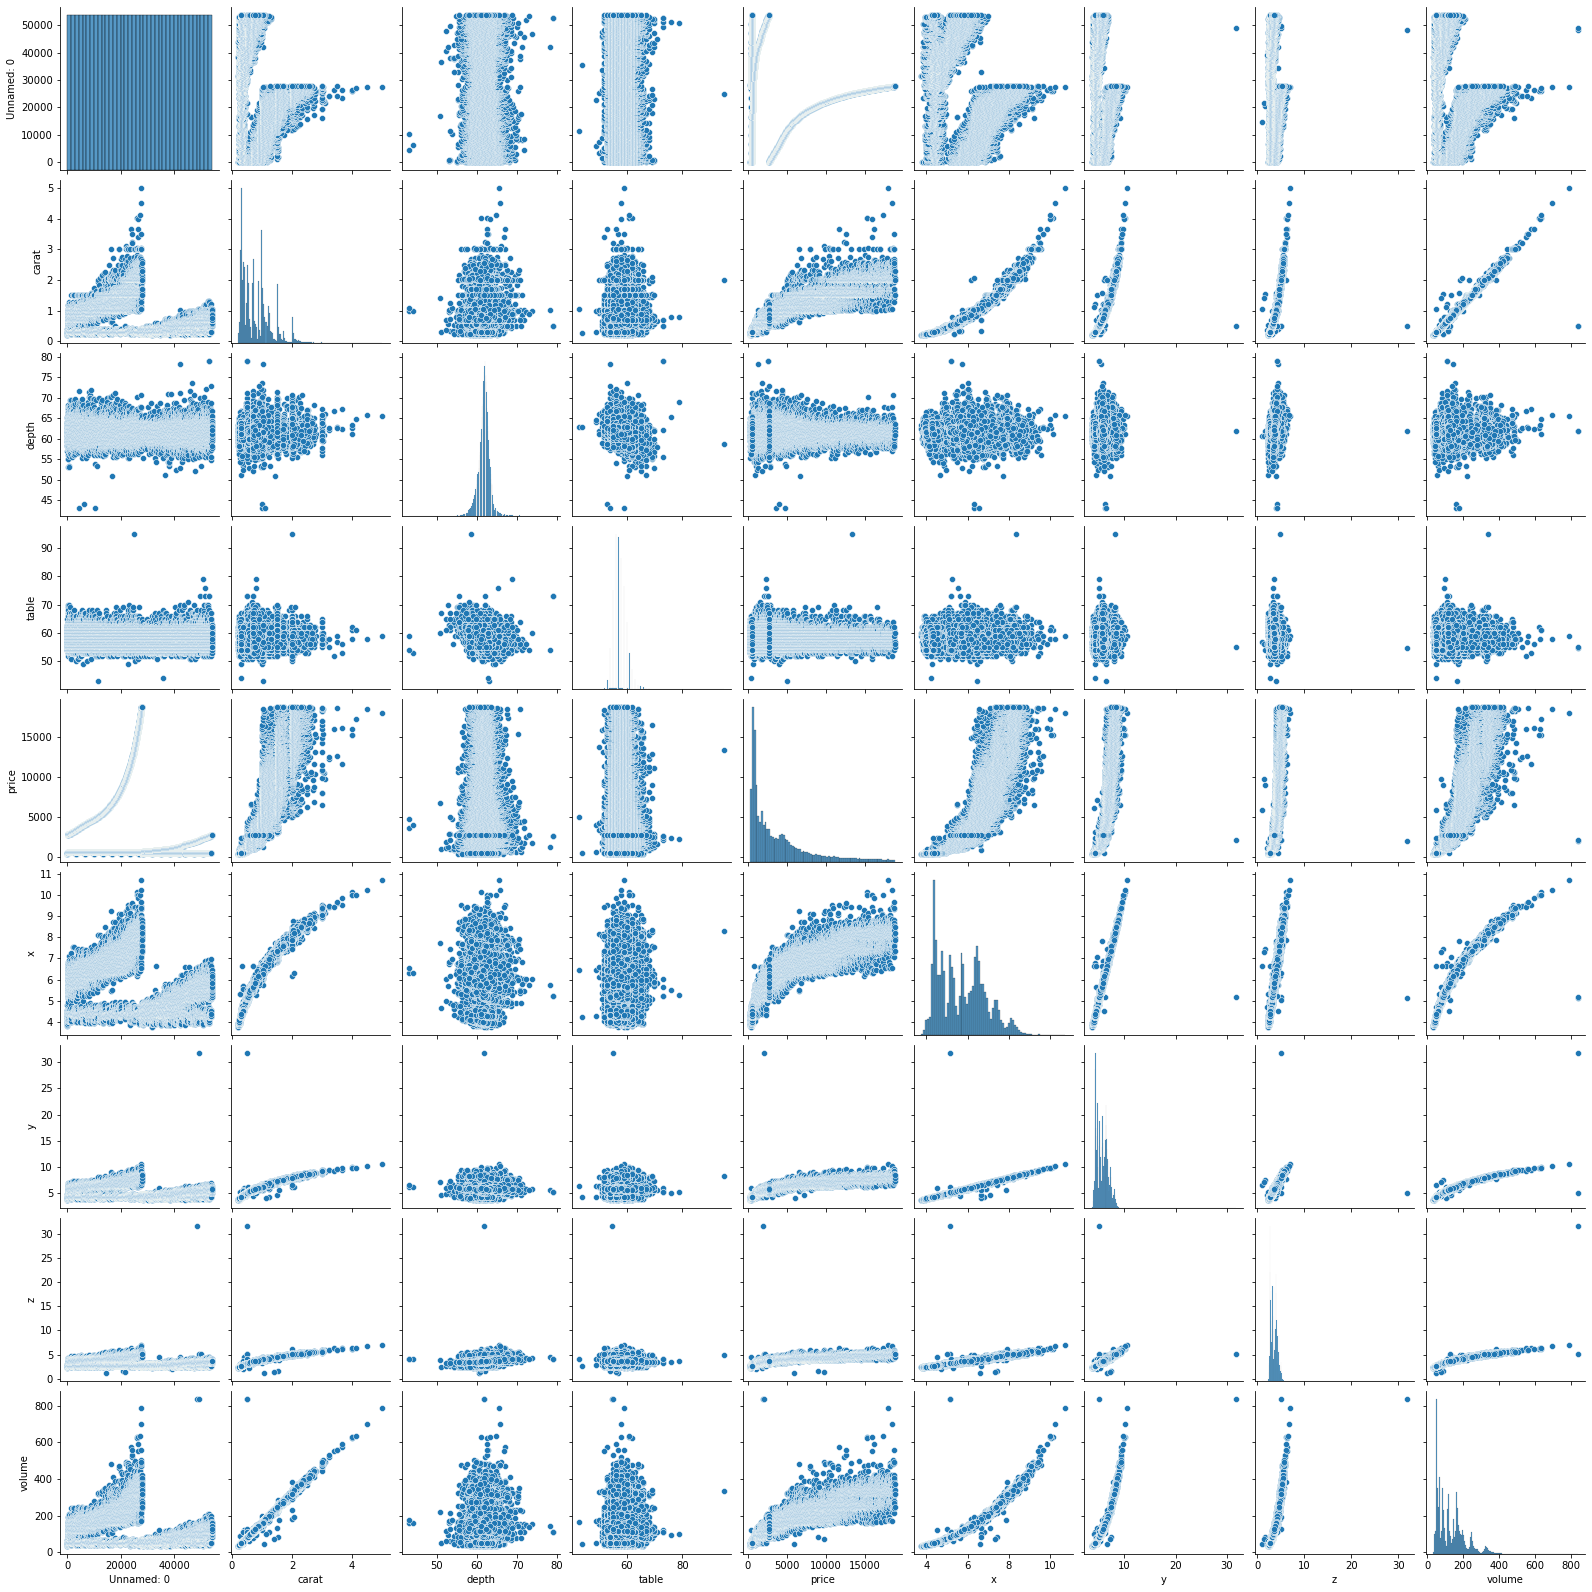

In [131]:
p=sns.pairplot(df)

## Removing the first column (unnamed)

In [132]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [133]:
df.corr()

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028356,0.181667,0.921586,0.977778,0.971647,0.961171,0.997138
depth,0.028356,1.000000,-0.295752,-0.010653,-0.024941,-0.027918,0.095300,0.011022
table,0.181667,-0.295752,1.000000,0.127258,0.196113,0.188511,0.152566,0.171608
price,0.921586,-0.010653,0.127258,1.000000,0.887222,0.884114,0.868327,0.921909
x,0.977778,-0.024941,0.196113,0.887222,1.000000,0.993373,0.975598,0.977333
y,0.971647,-0.027918,0.188511,0.884114,0.993373,1.000000,0.971333,0.976039
z,0.961171,0.095300,0.152566,0.868327,0.975598,0.971333,1.000000,0.967011
volume,0.997138,0.011022,0.171608,0.921909,0.977333,0.976039,0.967011,1.000000


### Now the carat to volume correlation is nearly 1. So we can easily drop one of them

In [134]:
df.drop(['volume'] , axis=1 , inplace=True)

# Now we are back to original attributes
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Encode categroical values (STEP 3)

### Since the color and depth have a relative order of preference we can use OrdinalEncoder

In [135]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [136]:
clarity=[['IF', 'VVS1', 'VVS2','VS1','VS2','SI1','SI2','I1']]
color_list=[['D', 'E', 'F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']]
cut_list=[['Ideal', 'Premium', 'Very Good','Good','Fair']]

In [137]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=clarity)
clarity = df[["clarity"]]
clarity_coded = ordinal_encoder.fit_transform(clarity)
df["clarity"]=clarity_coded


ordinal_encoder_color = OrdinalEncoder(categories=color_list)
color = df[["color"]]
color_coded = ordinal_encoder_color.fit_transform(color)
df["color"]=color_coded

ordinal_encoder_cut = OrdinalEncoder(categories=cut_list)
cut = df[["cut"]]
cut_coded = ordinal_encoder_cut.fit_transform(cut)
df["cut"]=cut_coded

df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.0,1.0,6.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1.0,1.0,5.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3.0,1.0,3.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1.0,5.0,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3.0,6.0,6.0,63.3,58.0,335,4.34,4.35,2.75


### Alternate option for encoding will be One-hot encoding

<AxesSubplot:>

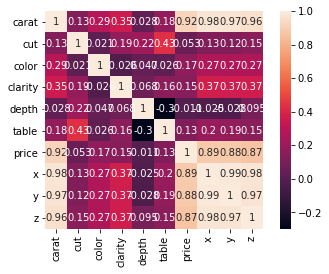

In [138]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

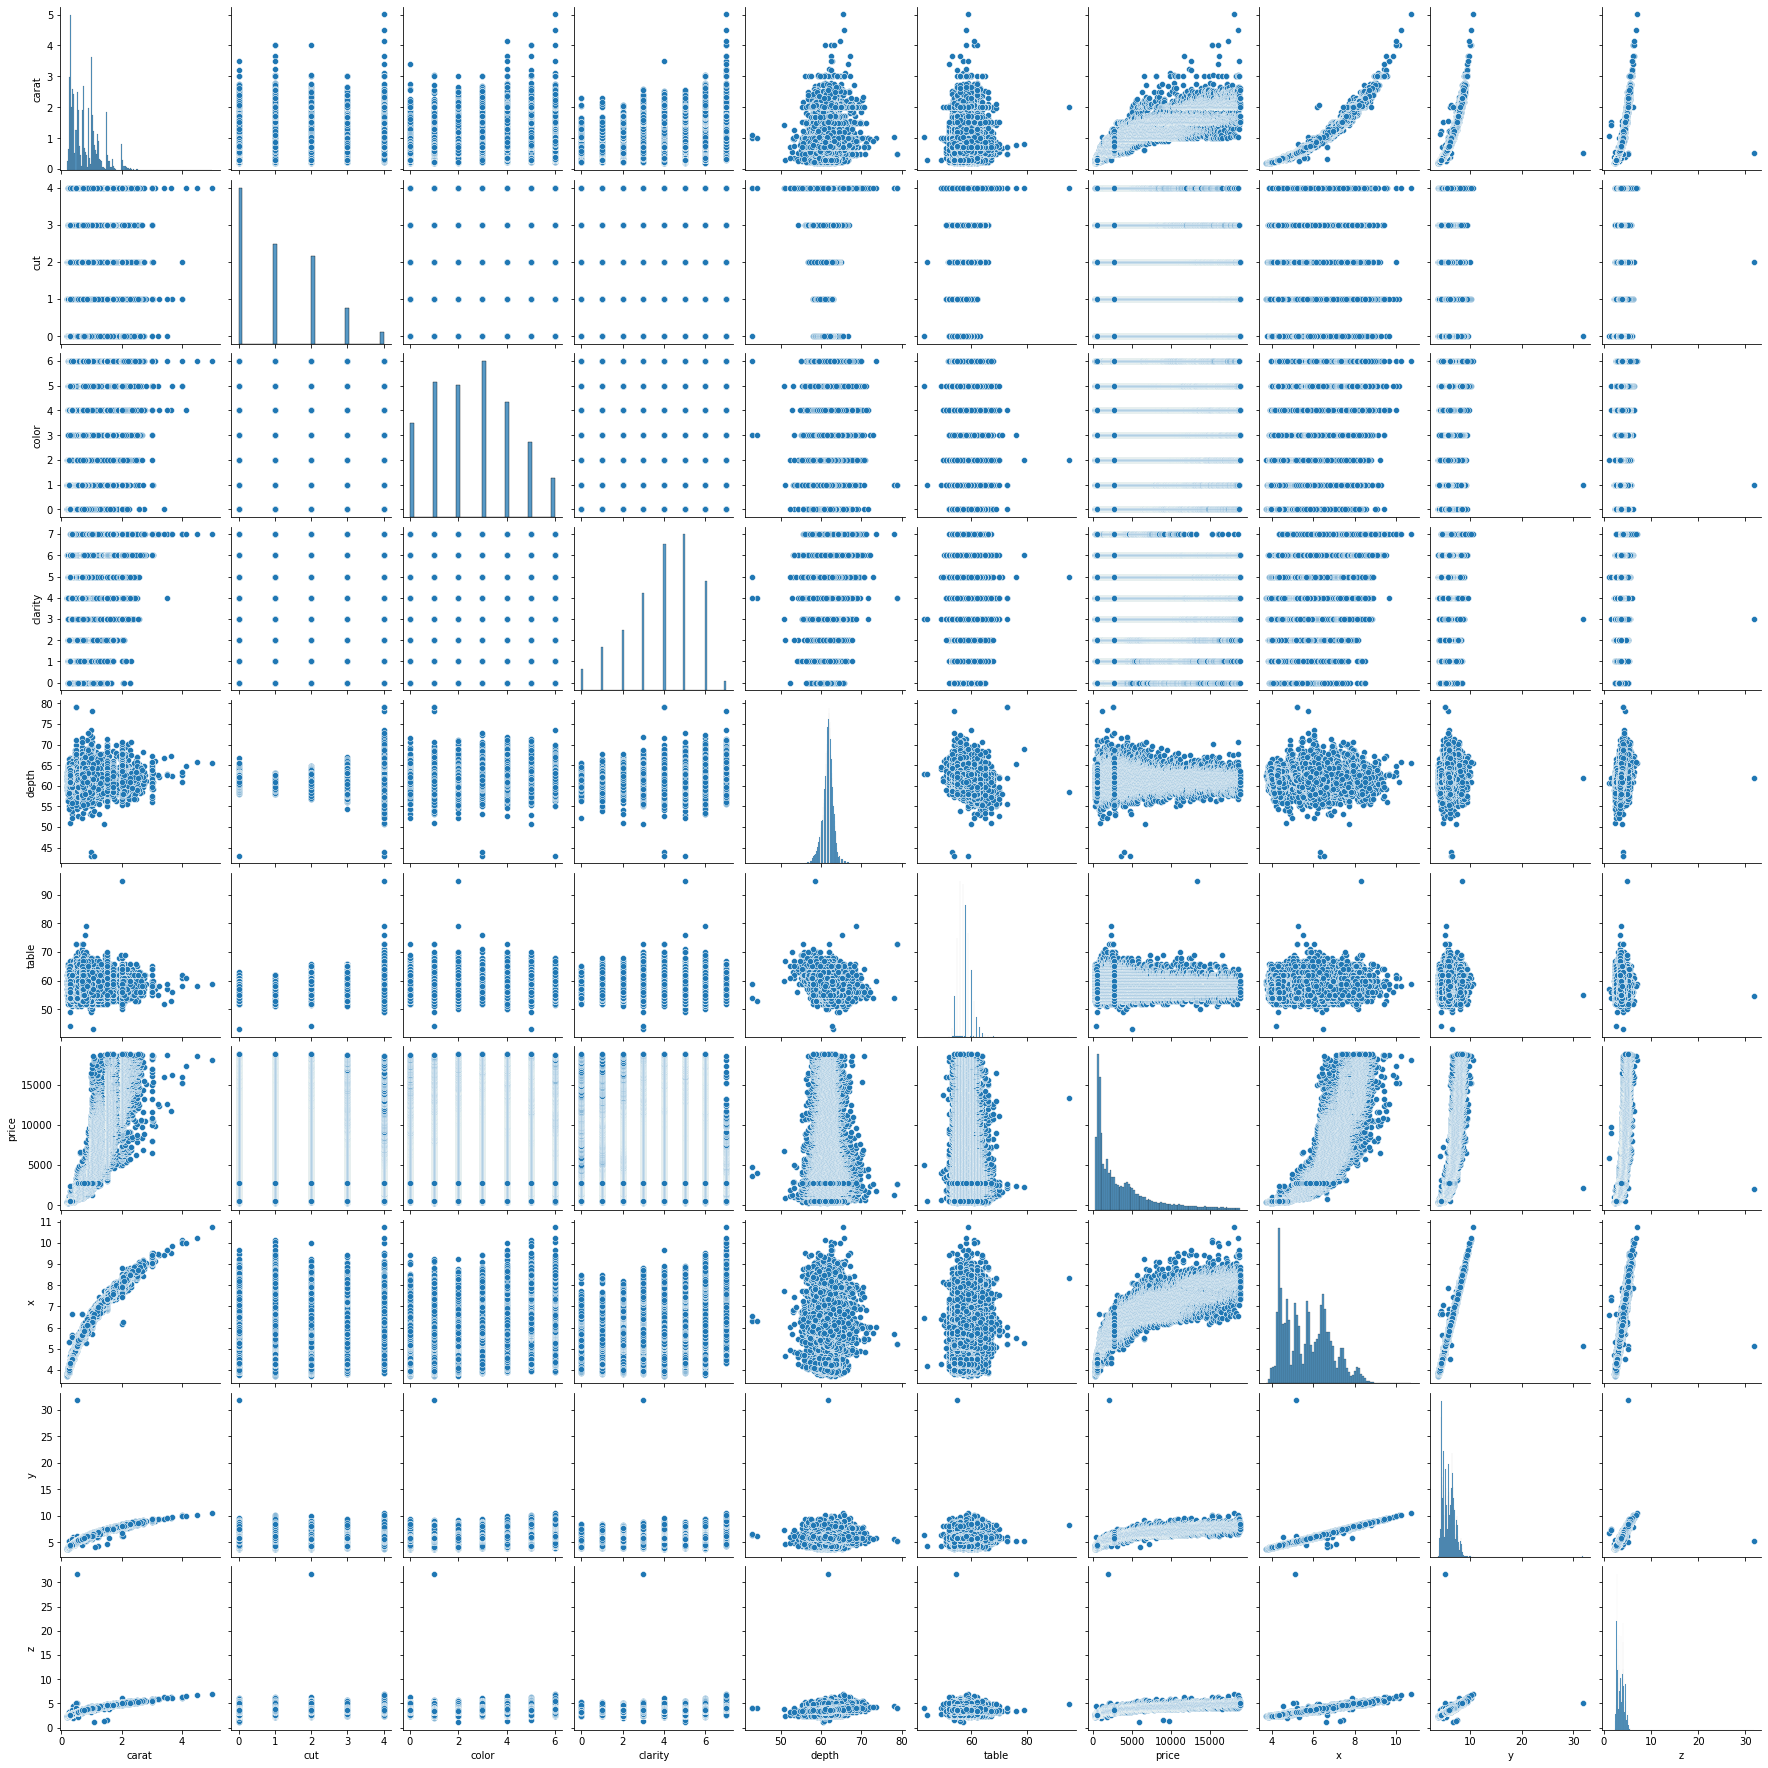

In [139]:
p=sns.pairplot(df)


## Splitting the dataset as X and y (STEP 4)

In [140]:
from sklearn.model_selection import train_test_split
random_seed = 66

dforigcopy=df.copy()

# y contains only the price column
y = df['price']

# X contains everything but the price column
X = df.drop(['price'], axis=1)


In [141]:
# also as per question we need to split by last attribute which is z
# y contains only the last column
yq = dforigcopy['z']

# X contains everything but the last column
Xq = dforigcopy.drop(['z'], axis=1)


## Splitting data into training and test set (STEP 5)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=random_seed)

In [143]:
X_test.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.00000,10784.000000
mean,0.792507,1.102745,2.591803,3.955861,61.759115,57.459264,5.715132,5.71673,3.530288
std,0.476794,1.119998,1.700661,1.650794,1.439778,2.261824,1.124212,1.11599,0.695398
min,0.200000,0.000000,0.000000,0.000000,43.000000,49.000000,3.730000,3.71000,2.260000
25%,0.390000,0.000000,1.000000,3.000000,61.100000,56.000000,4.690000,4.70750,2.890000
50%,0.700000,1.000000,3.000000,4.000000,61.900000,57.000000,5.680000,5.68000,3.510000
75%,1.040000,2.000000,4.000000,5.000000,62.500000,59.000000,6.532500,6.53000,4.030000
max,4.010000,4.000000,6.000000,7.000000,78.200000,95.000000,10.140000,10.10000,6.270000


## Scaling parameters

In [144]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder


sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#y_train = sc.fit_transform(y_train)
#y_test = sc.transform(y_test)

## Applying 10-fold cross validation (STEP 6 )


In [145]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import cross_val_score


fold_count = 10

# Algorithm set to Linear Regression
lr_model = LinearRegression()

# Shuffle is false by default. Random seed is kept in case shuffle is turned on later
kfold = KFold(n_splits=fold_count, random_state=random_seed)
accuracies = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = kfold)


C:\Users\rahul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Train Linear Regression model (STEP 7)

In [146]:

lr_model.fit(X_train , y_train)
y_pred = lr_model.predict(X_test)


## Computing the accuracy (STEP 8)

Linear Regression:
Cross validation Score : 0.9029
Standard Deviation : 0.0099
[0.89325137 0.90541618 0.91544973 0.9016245  0.88028642 0.89939037
 0.90429233 0.90440311 0.91167395 0.91366503]


[(0.8, 1.0)]

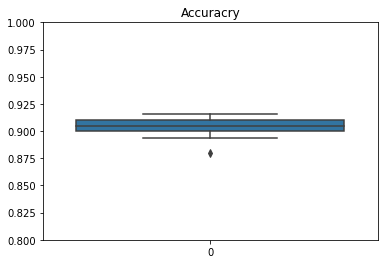

In [147]:
print("Linear Regression:")
print('Cross validation Score : %.4f' % accuracies.mean())
print('Standard Deviation : %.4f' % accuracies.std())

print(accuracies)

bplot=sns.boxplot(data=accuracies)
bplot.set(title='Accuracry')
bplot.set(ylim=(0.8, 1))


### Cross validation Score : 0.9077
### Standard Deviation : 0.0099

# Model evaluation using predicted data

In [148]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 1484849.46 
MAE    : 802.80 
RMSE   : 1218.54 
R2     : 0.91 


### ---------------------------------------------------------------

## RESULTS

### Means Square Error (MSE)    : 1484849.46 
### Mean Absolute Error  (MAE)  : 802.80 
### Root Mean Square Error (RMSE)   : 1218.54 
### R-square Value (R2)     : 0.91

### ---------------------------------------------------------------



## Visualizing results (STEP 9)

In [149]:

def visualize(Y,X,Y_pred,title="Scatter Plot",xlabel="X",ylabel="Y",pred_reqd=True):
    fig, ax = plt.subplots()
    Y = Y.reshape(-1,1)

    ax.scatter(X, Y, color='blue',label="Observed")       # observed values
    if(pred_reqd==True):
        ax.scatter(X, Y_pred, color='green',label="Predicted") # predicted values
        ax.vlines(X,Y, Y_pred, color='red', label="Residual Error")  # residual lines
        plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='black',label="Regression line")  # regression line

    plt.title(title)
    ax.legend()
    ax.grid(True)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

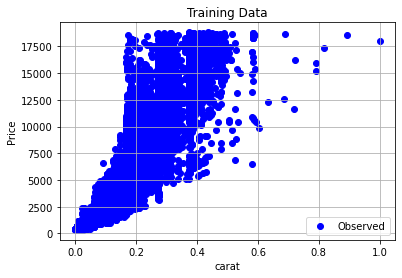

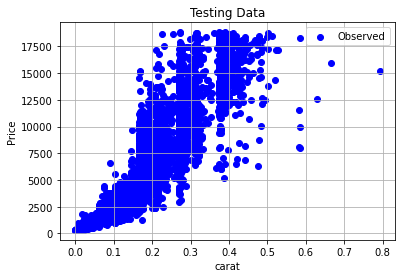

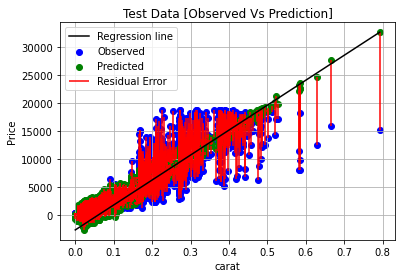

In [150]:
predictor_index=0;

pred_name=df.columns[predictor_index]
pred_name
visualize(np.array(y_train),X_train[:,predictor_index],np.nan,"Training Data",pred_name,"Price",False)
visualize(np.array(y_test),X_test[:,predictor_index],np.nan,"Testing Data",pred_name,"Price",False)
visualize(np.array(y_test),X_test[:,predictor_index],y_pred,"Test Data [Observed Vs Prediction]",pred_name,"Price")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-pack

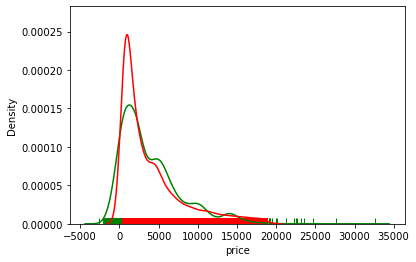

In [151]:
# Seeing a distribution of predictions and observed values

sns.distplot(y_pred,hist=False,rug=True,color="green",label="Predictions")
sns.distplot(y_test,hist=False,rug=True,color="red",label="actual")
plt.show()